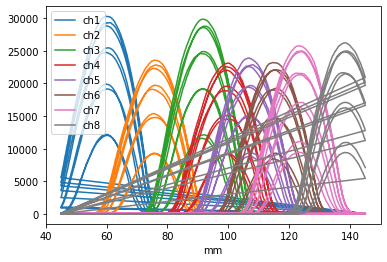

In [43]:
import pandas as pd
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs() 
dataset

plotcols = dataset.filter(like='ch').columns
dataset.plot(x='mm', y = plotcols)

In [50]:
ds = ds[(ds.mm >90) & (ds.mm < 130)]

ds = dataset.sort_values(['mm', 'offsetx_abs'])
ds

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx,offsetx_abs
4004,45.0,5568.0,29.0,18.0,38.0,13.0,21.0,45.0,23.0,0.0,0.0
3003,45.0,4322.0,18.0,17.0,37.0,13.0,21.0,45.0,23.0,-3.0,3.0
5005,45.0,4839.0,29.0,17.0,38.0,13.0,21.0,45.0,23.0,3.0,3.0
2002,45.0,2515.0,22.0,15.0,37.0,13.0,21.0,45.0,23.0,-6.0,6.0
6006,45.0,3589.0,20.0,17.0,37.0,13.0,21.0,45.0,23.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
7006,145.0,50.0,12.0,18.0,37.0,13.0,21.0,48.0,16631.0,6.0,6.0
2001,145.0,50.0,14.0,18.0,37.0,12.0,21.0,46.0,11259.0,-9.0,9.0
8007,145.0,50.0,26.0,18.0,37.0,13.0,21.0,47.0,12788.0,9.0,9.0
1000,145.0,50.0,26.0,18.0,37.0,13.0,21.0,46.0,5451.0,-12.0,12.0


In [51]:
# drop too low levels
lowlevel = 1000
for i in range(1,9):
    ds.iloc[:,i] = [0 if j < lowlevel else j for j in ds.iloc[:,i]]
ds

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx,offsetx_abs
4004,45.0,5568.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,45.0,4322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,3.0
5005,45.0,4839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
2002,45.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,6.0
6006,45.0,3589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
7006,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16631.0,6.0,6.0
2001,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11259.0,-9.0,9.0
8007,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12788.0,9.0,9.0
1000,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5451.0,-12.0,12.0


In [73]:
# crate ratio columns
ds['ch3_div_ch5'] = ds.ch3 /ds.ch5
ds['ch4_div_ch6'] = ds.ch4 /ds.ch6
ds['ch5_div_ch7'] = ds.ch5 /ds.ch7
ds['ch3_div_ch4'] = ds.ch3 /ds.ch4
ds['ch5_div_ch4'] = ds.ch5 /ds.ch4
ds['ch6_div_ch5'] = ds.ch6 /ds.ch5
ds['ch7_div_ch6'] = ds.ch7 /ds.ch6

dcolumns = ds.filter(like='div').columns.to_list()

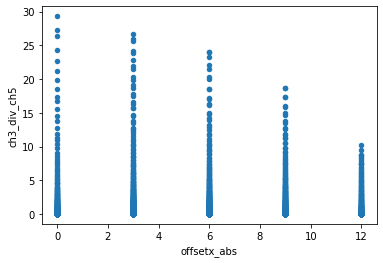

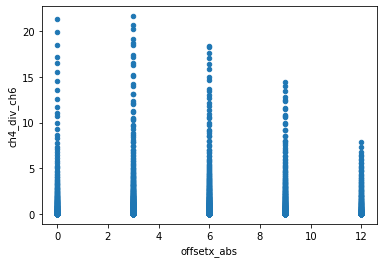

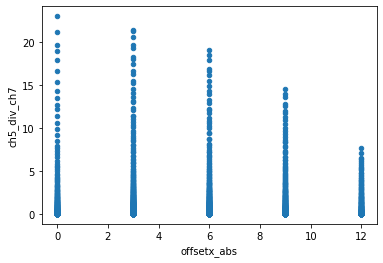

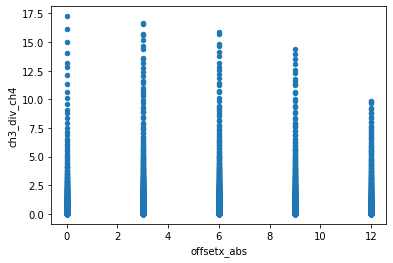

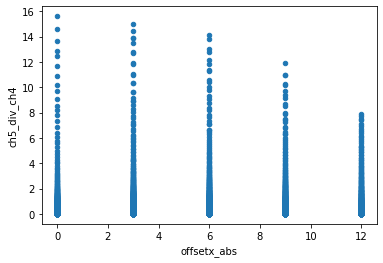

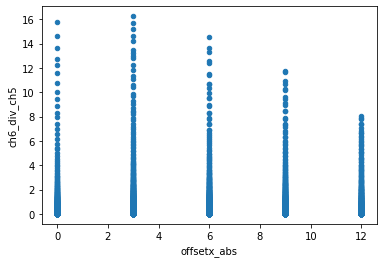

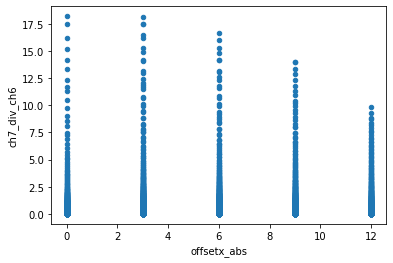

In [86]:
#for i in dcolumns:
#    ds.plot(x='offsetx_abs', y=i, kind='scatter')

In [87]:
# generate standardized
#origcols = []
#for i in range(1,9):
#    origcols.append(f'ch{i}')
#    #dataset[f'ch_norm_{i}'] = (dataset[f'ch{i}'] - dataset[f'ch{i}'].mean()) / dataset[f'ch{i}'].std()
#    dataset[f'ch_norm_{i}'] = dataset[f'ch{i}'] / dataset[f'ch{i}'].max()
#
#dataset.drop(origcols, axis=1, inplace=True)
#    
#print(dataset)


In [88]:
predcols = ds.filter(like='div').columns.to_list()
predcols.append('offsetx_abs')
predcols

['ch3_div_ch5',
 'ch4_div_ch6',
 'ch5_div_ch7',
 'ch3_div_ch4',
 'ch5_div_ch4',
 'ch6_div_ch5',
 'ch7_div_ch6',
 'offsetx_abs']

In [89]:
dataset = ds.filter(predcols)
dataset

,ch3_div_ch5,ch4_div_ch6,ch5_div_ch7,ch3_div_ch4,ch5_div_ch4,ch6_div_ch5,ch7_div_ch6,offsetx_abs
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
6006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...
7006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
8007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0


In [90]:
data = dataset.sample(frac=0.5, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4504, 8)
Unseen Data For Predictions: (4505, 8)


In [91]:
from pycaret.regression import *

In [92]:
#? setup

In [95]:
exp_reg101 = setup(data = data, 
                   transformation=False, 
                   target = 'offsetx_abs', 
                   pca = False,
                   polynomial_features=False,
                   polynomial_degree=3,
                   remove_outliers=False,
                   outliers_threshold=0.05,
                   trigonometry_features=False,
                   session_id=123, 
                   feature_selection=False,
                   feature_interaction=False,
                   feature_ratio=False,
                   ignore_features=None
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4504, 8)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [96]:
#exp_reg101

In [99]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.771800,11.942600,3.452000,0.241600,0.730800,0.406200
1,Light Gradient Boosting Machine,2.784600,12.048900,3.467200,0.235000,0.730300,0.410700
2,Extreme Gradient Boosting,2.940200,12.592300,3.545800,0.199900,0.753100,0.429900
3,Gradient Boosting Regressor,2.939700,12.592800,3.546100,0.199700,0.753000,0.429900
4,Random Forest,2.848200,13.123300,3.618500,0.166400,0.749500,0.426800
5,Extra Trees Regressor,2.852500,13.529800,3.673900,0.140900,0.759000,0.433300
6,Support Vector Machine,3.209800,14.680500,3.829800,0.066600,0.774800,0.450500
7,Decision Tree,2.986900,15.000700,3.869200,0.045900,0.824500,0.460600
8,AdaBoost Regressor,3.331300,15.179700,3.894500,0.034800,0.796800,0.494000
9,K Neighbors Regressor,3.100700,15.336200,3.904200,0.022900,0.785700,0.474600


In [98]:
#create_model.__doc__
#help(tune_model)
# et=tune_model('et', n_iter=100)
et=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6069,11.6430,3.4122,0.2093,0.6929,0.4185
1,3.0758,15.1943,3.8980,0.1334,0.7932,0.4598
2,3.1349,15.5141,3.9388,0.0576,0.8428,0.4159
3,2.9956,14.4126,3.7964,0.0413,0.7604,0.4677
4,2.9472,14.9615,3.8680,0.1152,0.8155,0.4397
5,2.7351,12.9579,3.5997,0.1537,0.7755,0.4024
6,2.8218,13.3205,3.6497,0.1754,0.7609,0.4312
7,2.8067,12.9531,3.5990,0.1453,0.7445,0.4618
8,2.7793,12.4738,3.5318,0.1648,0.7054,0.4236
9,2.6216,11.8672,3.4449,0.2133,0.6992,0.4119


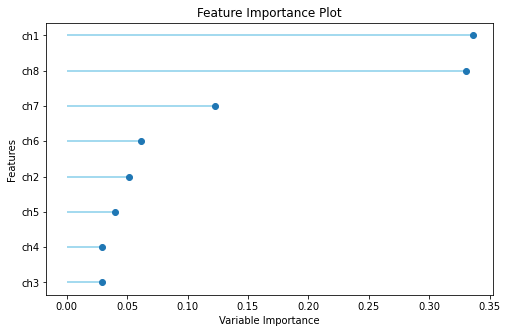

In [344]:
plot_model(et, 'feature')

In [345]:
#interpret_model(et)

In [346]:
#interpret_model(et, plot = 'correlation')

In [347]:
#interpret_model(et, plot = 'reason', observation = 10)

In [348]:
#pred=predict_model(et, data=data_unseen)
#pred

In [349]:
#? predict_model

In [350]:
#save_model(et, 'savedmodelet')
#et_saved = load_model('savedmodelet')

In [351]:
#save_experiment('experiment')

In [352]:
#experiment_loaded = load_experiment('experiment')

In [ ]:
import pandas as pd
import time
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs()

# drop too low levels

from pycaret.regression import *

for lowlevel in range(0, 10000, 100):
    data = dataset.sample(frac=0.5, random_state=786)
    data_unseen = dataset.drop(data.index).reset_index(drop=True)
    data.reset_index(drop=True, inplace=True)

    for i in range(1,9):
            data.iloc[:,i] = [0 if j < lowlevel else j for j in data.iloc[:,i]]

    es = setup(data = data, target = 'mm', ignore_features=['offsetx', 'offsetx_abs'], silent=True)
    print(f'lowlevel: {lowlevel}')
    et = create_model('et')
    time.sleep(10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8105,62.5965,7.9118,0.9244,0.0988,0.0384
1,2.2517,43.5682,6.6006,0.9459,0.0863,0.0316
2,2.5475,42.1084,6.4891,0.9537,0.0954,0.0401
3,2.7292,68.1901,8.2577,0.9151,0.1013,0.0357
4,3.1126,68.1046,8.2525,0.9257,0.1088,0.0438
5,2.3710,45.3006,6.7306,0.9437,0.0875,0.0320
6,2.7853,61.9058,7.8680,0.9221,0.1010,0.0386
7,2.7197,50.1772,7.0836,0.9425,0.0981,0.0416
8,3.2691,79.2181,8.9005,0.9071,0.1155,0.0463
9,2.7355,72.2182,8.4981,0.9115,0.1064,0.0373
